# importing required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
import re
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score

In [2]:
import chardet

In [3]:
with open(r"C:\Users\ravin\Downloads\Airline-Sentiment-2-w-AA.csv",'rb') as file:
    data = file.read()
    print(chardet.detect(data))
    

{'encoding': 'MacRoman', 'confidence': 0.7179065582558102, 'language': ''}


In [4]:
df = pd.read_csv(r"C:\Users\ravin\Downloads\Airline-Sentiment-2-w-AA.csv",encoding='MacRoman')

In [5]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [6]:
df.shape

(14640, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _unit_id                      14640 non-null  int64  
 1   _golden                       14640 non-null  bool   
 2   _unit_state                   14640 non-null  object 
 3   _trusted_judgments            14640 non-null  int64  
 4   _last_judgment_at             14584 non-null  object 
 5   airline_sentiment             14640 non-null  object 
 6   airline_sentiment:confidence  14640 non-null  float64
 7   negativereason                9178 non-null   object 
 8   negativereason:confidence     10522 non-null  float64
 9   airline                       14640 non-null  object 
 10  airline_sentiment_gold        40 non-null     object 
 11  name                          14640 non-null  object 
 12  negativereason_gold           32 non-null     object 
 13  r

In [8]:
df.isna().sum()

_unit_id                            0
_golden                             0
_unit_state                         0
_trusted_judgments                  0
_last_judgment_at                  56
airline_sentiment                   0
airline_sentiment:confidence        0
negativereason                   5462
negativereason:confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_id                            0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [9]:
df['text'].isna().sum()

0

In [10]:
df.duplicated().sum()

0

# text Analysis

In [11]:
def eda(data,column):
    count = 0
    count = data[column].apply(lambda x : count + emoji.emoji_count(x)).sum()
    lower = data[column].str.islower().sum()
    url= df[column].apply(lambda x : True if re.search(r'www.\S+ | http?://\S+',x) else False).sum()
    tags =  df[column].apply(lambda x :True if  re.search(r'<[^>]+',x) else False).sum()
    marks = df[column].apply(lambda x :True if  re.search(r'[^a-zA-Z0-9 ]',x) else False).sum()
    digits = df[column].apply(lambda x :True if  re.search(r'[0-9]',x) else False).sum()
    return pd.Series({'emoji':count,'lower case':lower,'url':url,'HTMLtags':tags,'punctuations':marks,'digits':digits})
 

In [12]:
eda(df,'text')

emoji             331
lower case        472
url              1106
HTMLtags            0
punctuations    14640
digits           5868
dtype: int64

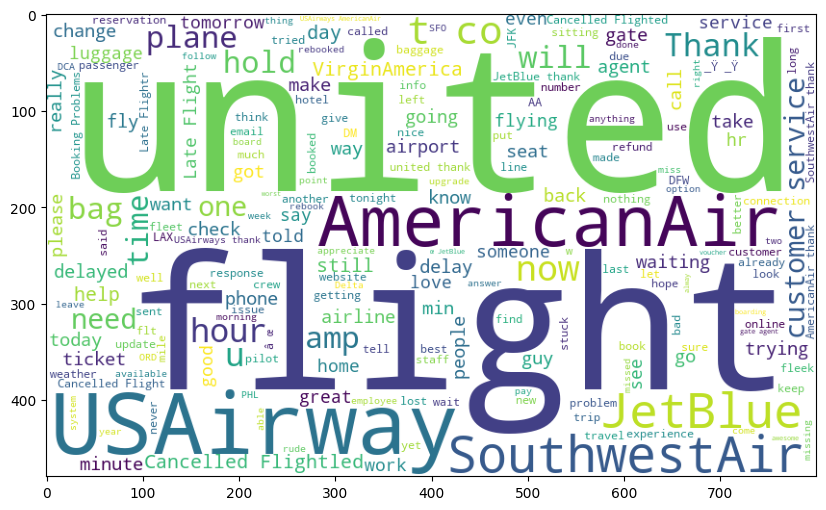

In [13]:
plt.figure(figsize=(10,6))
data = WordCloud(width=800,height=480,background_color='white').generate(' '.join(df['text']))
plt.imshow(data)
plt.savefig('wordcloud')

In [14]:
df['text'] = df['text'].apply(lambda x: emoji.demojize(x))

In [15]:
df['text'] = df['text'].apply(lambda x: x.lower())

In [16]:
df['text'] = df['text'].apply(lambda x: re.sub(r'www.\S+ | http?://\S+',' ',x))

In [17]:
df['text'] = df['text'].apply(lambda x : re.sub(r'[^a-zA-Z]',' ',x))

In [18]:
eda(df,'text')

emoji               0
lower case      14640
url                 1
HTMLtags            0
punctuations        0
digits              0
dtype: int64

In [19]:
analyzer =  SentimentIntensityAnalyzer()

In [20]:
def polarity(n):
    return analyzer.polarity_scores(n)['compound']

In [21]:
df['polarity'] = df['text'].apply(polarity)

In [22]:
df['polarity'].min(),df['polarity'].max()

(-0.9595, 0.974)

In [23]:
df = df[['text','polarity']]

In [24]:
def sentiment(n):
    if n < 0:
        return "Negative"
    elif 0 < n <= 0.5:
        return "Neutral"
    else:
        return "Positive"

In [25]:
df['sentiment'] = df['polarity'].apply(sentiment)

In [26]:
df['sentiment']

0        Positive
1        Positive
2        Positive
3        Negative
4        Negative
           ...   
14635     Neutral
14636    Negative
14637     Neutral
14638     Neutral
14639     Neutral
Name: sentiment, Length: 14640, dtype: object

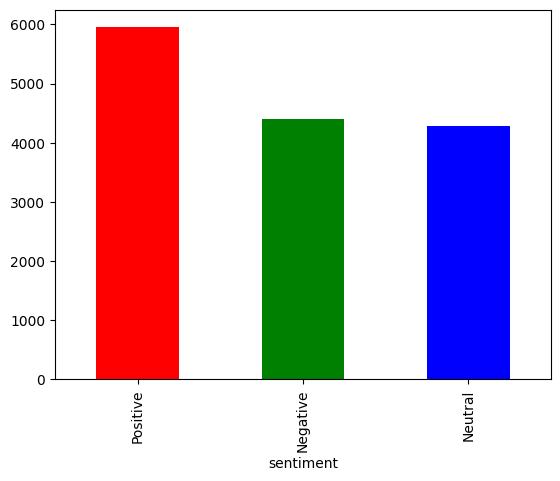

<Figure size 640x480 with 0 Axes>

In [27]:
df['sentiment'].value_counts().plot(kind='bar',color=['r','g','b'])
plt.show()
plt.savefig('sentiment.png')

In [28]:
#Positive
df.iloc[0]['text']

' virginamerica what  dhepburn said '

In [29]:
#Positive
df.iloc[5]['text']

' virginamerica seriously would pay     a flight for seats that didn t have this playing  it s really the only bad thing about flying va'

In [30]:
#Neutral
df.iloc[14635]['text']

' americanair thank you we got on a different flight to chicago '

In [31]:
    df

,text,polarity,sentiment
0,virginamerica what dhepburn said,0.0000,Positive
1,virginamerica plus you ve added commercials t...,0.0000,Positive
2,virginamerica i didn t today must mean i n...,0.0000,Positive
3,virginamerica it s really aggressive to blast...,-0.2716,Negative
4,virginamerica and it s a really big bad thing...,-0.5829,Negative
...,...,...,...
14635,americanair thank you we got on a different f...,0.3612,Neutral
14636,americanair leaving over minutes late flig...,-0.7906,Negative
14637,americanair please bring american airlines to...,0.3182,Neutral
14638,americanair you have my money you change my ...,0.3818,Neutral


In [32]:
df.drop('polarity',axis=1,inplace=True)

In [33]:
X = df.drop('sentiment',axis=1)
y = df['sentiment']

In [34]:
X

,text
0,virginamerica what dhepburn said
1,virginamerica plus you ve added commercials t...
2,virginamerica i didn t today must mean i n...
3,virginamerica it s really aggressive to blast...
4,virginamerica and it s a really big bad thing...
...,...
14635,americanair thank you we got on a different f...
14636,americanair leaving over minutes late flig...
14637,americanair please bring american airlines to...
14638,americanair you have my money you change my ...


In [35]:
y

0        Positive
1        Positive
2        Positive
3        Negative
4        Negative
           ...   
14635     Neutral
14636    Negative
14637     Neutral
14638     Neutral
14639     Neutral
Name: sentiment, Length: 14640, dtype: object

# Deviding the data into train and test

In [36]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=23)

In [37]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((11712, 1), (11712,), (2928, 1), (2928,))

# Data preprocessing on X_train

In [38]:
X_train

,text
8461,jetblue kylecomer jetblue relate flight...
2561,united typically once you get the problem fix...
3128,united being delayed hours for a one hour ...
13780,americanair hey you cancelled flightled my fl...
14558,americanair brewcrewfan is this real life ...
...,...
11190,usairways what s happening with phl to l...
10185,usairways you got to be f ing kidding me usa...
9256,usairways just now but no general announcement
13030,americanair unacceptable it s clear losing j...


# feature extraction

In [39]:
vector= CountVectorizer()

In [40]:
X_train_num = pd.DataFrame(vector.fit_transform(X_train['text']).toarray(),columns=vector.get_feature_names_out())

In [41]:
X_train_num.shape,y_train.shape

((11712, 10728), (11712,))

In [42]:
X_test_num = pd.DataFrame(vector.transform(X_test['text']).toarray(),columns=vector.get_feature_names_out())

In [43]:
X_test_num.shape,y_test.shape

((2928, 10728), (2928,))

# model Building

In [44]:
rf = RandomForestClassifier()

In [ ]:
import joblib
from joblib import Memory

import os

In [ ]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)
pipelines = {
    'knn' : Pipeline([
        
        ('classifier', KNeighborsClassifier())
    ]), 
    'svc' : Pipeline([
        
        ('classifier', SVC())
    ]),
    'logistic_regression': Pipeline([
        
        ('classifier', LogisticRegression())
    ]),
    'random_forest': Pipeline([
        
        ('classifier', RandomForestClassifier())
    ]),
    'decision_tree': Pipeline([
        
        ('classifier', DecisionTreeClassifier())
    ]),
    'naive_bayes': Pipeline([
        
        ('classifier', GaussianNB())
    ])
}



In [45]:
rf.fit(X_train_num,y_train)

RandomForestClassifier()

In [46]:
y_pred = rf.predict(X_test_num)

In [47]:
accuracy_score(y_test,y_pred)

0.6854508196721312

In [48]:
import pickle

In [49]:
model2 = pickle.dump(rf,open('rf4.pkl','wb'))

In [50]:
model2 = pickle.load(open('rf4.pkl','rb'))

In [54]:
model2.predict(text)[0]

C:\Users\ravin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'Neutral'

In [53]:
text =vector.transform([' americanair thank you we got on a different flight to chicago '])

In [ ]:
text